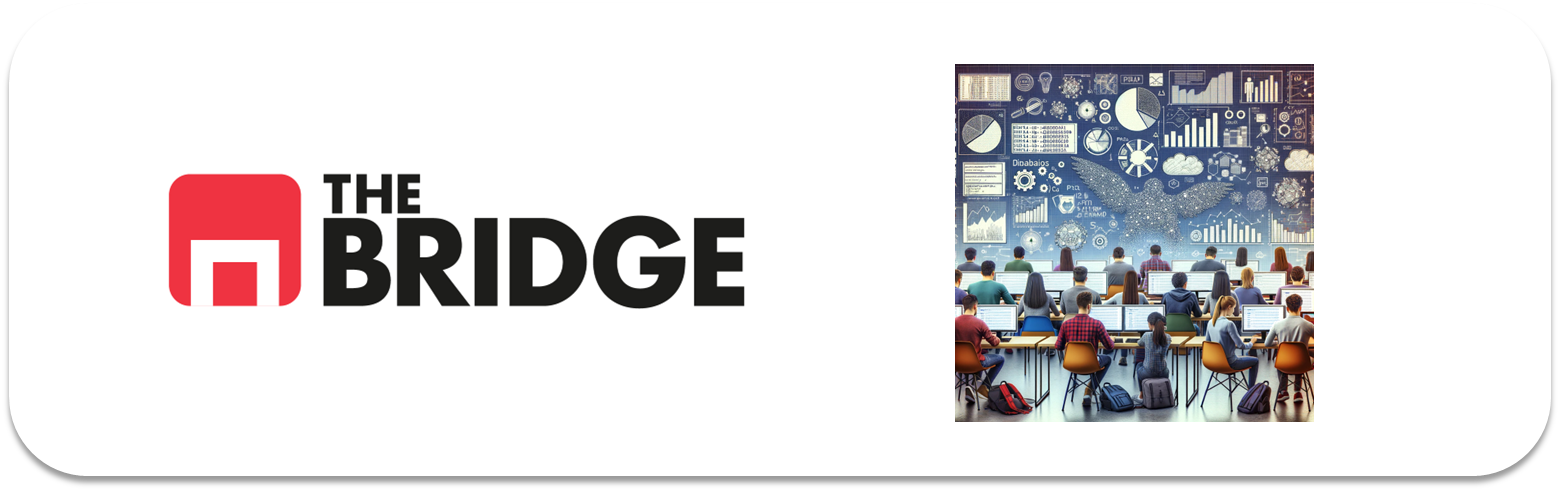

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [73]:
# Librerias necesarias para la creacion del modelo de regresion lineal
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
sns.set_style("whitegrid")
%matplotlib inline

In [75]:
# Cargamos el dataset
url = r"https://raw.githubusercontent.com/rodolso/DS_Online_Octubre24_Exercises/refs/heads/main/04_Machine_Learning/Sprint_10/Unidad_01/Practica_Obligatoria/data/hard_to_find/obligatoria_hard.csv"
dataset = pd.read_csv(url, delimiter = "|")

In [76]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [78]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


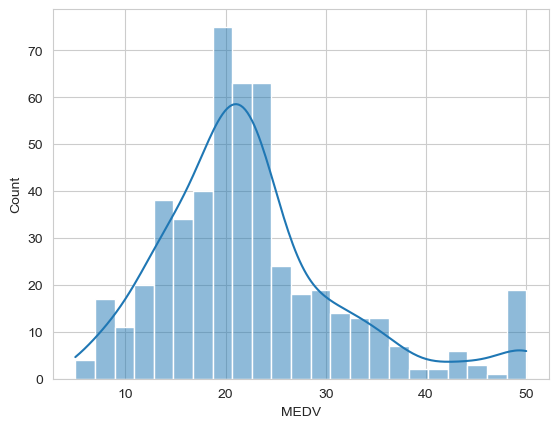

In [79]:
# Mostrar la distribucion de la variable target
sns.histplot(dataset["MEDV"], kde = True)
plt.show()

* Los datos se aproximan bastante bien a una Gaussiana.

In [80]:
# Dividir en conjunto de entrenamiento y prueba primero
X = dataset.drop(columns = ["MEDV"])
y = dataset["MEDV"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Mini-EDA

In [81]:
# Selección de características basada en correlación (solo en el conjunto de entrenamiento)
correlation_matrix = X_train.copy()
correlation_matrix["MEDV"] = y_train
correlation_matrix = correlation_matrix.corr()

# Correlación con la target
correlation_with_target = correlation_matrix["MEDV"].sort_values(ascending = False)
print("\nCorrelaciones con la target:\n", correlation_with_target)

# Correlación con la target en valor absoluto
correlation_with_target = correlation_with_target.abs().sort_values(ascending = False)
print("\nCorrelaciones con la target en valor absoluto:\n", correlation_with_target)


Correlaciones con la target:
 MEDV       1.000000
RM         0.710680
ZN         0.309504
DIS        0.235114
CHAS       0.190642
AGE       -0.340216
CRIM      -0.380091
RAD       -0.387467
NOX       -0.415768
TAX       -0.459795
INDUS     -0.470546
PTRATIO   -0.491210
LSTAT     -0.736422
Name: MEDV, dtype: float64

Correlaciones con la target en valor absoluto:
 MEDV       1.000000
LSTAT      0.736422
RM         0.710680
PTRATIO    0.491210
INDUS      0.470546
TAX        0.459795
NOX        0.415768
RAD        0.387467
CRIM       0.380091
AGE        0.340216
ZN         0.309504
DIS        0.235114
CHAS       0.190642
Name: MEDV, dtype: float64


<Axes: >

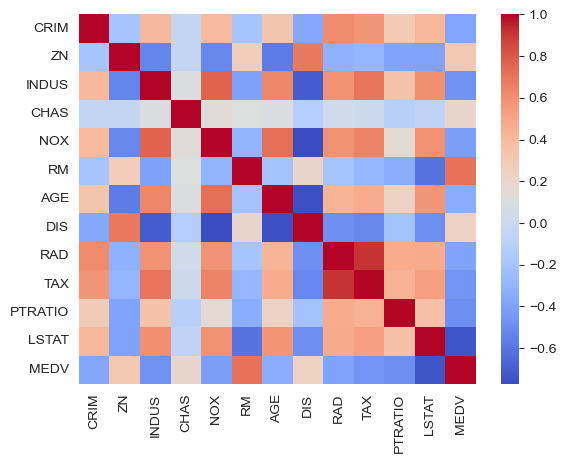

In [82]:
# Mostramos la matriz de correlación con los datos de entrenamiento
sns.heatmap(correlation_matrix, annot = False, cmap = "coolwarm")

In [83]:
# Selección de variables numéricas con correlación absoluta > 0.3
numeric_features = correlation_with_target[abs(correlation_with_target) > 0.3].index.tolist()
numeric_features.remove("MEDV")  # Excluir la target
print("\nFeatures numéricas seleccionadas:", numeric_features)


Features seleccionadas: ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'RAD', 'CRIM', 'AGE', 'ZN']


<Axes: >

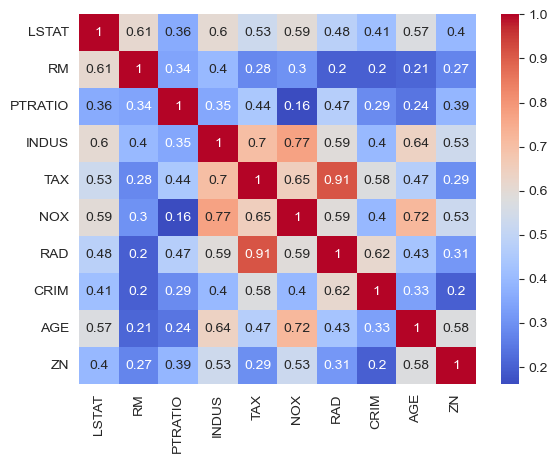

In [84]:
# Mostramos otra matriz de correlación para ver la colinealidad entre las variables seleccionadas
sns.heatmap(X_train[numeric_features].corr().abs(), annot = True, cmap = "coolwarm")

In [85]:
# Miramos las variables categóricas
cat_features = ["CHAS", "RAD"]

In [86]:
X_train["CHAS"].value_counts()

CHAS
0.0    375
1.0     29
Name: count, dtype: int64

In [87]:
# Hacemos un join de todo el train
join_data = pd.concat([X_train, y_train], axis = 1)

<Axes: xlabel='MEDV', ylabel='Count'>

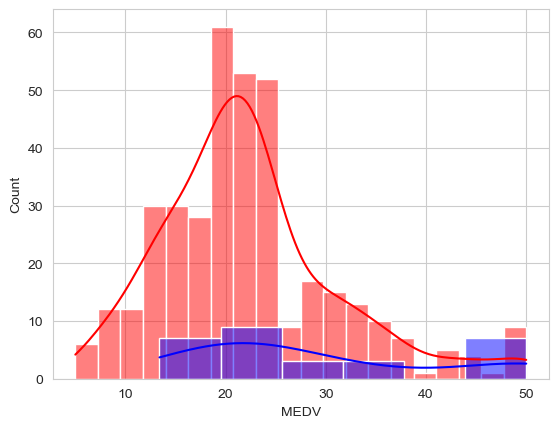

In [95]:
# Comparamos la distribución de la variable target contra la variable categórica CHAS
sns.histplot(data = join_data[join_data["CHAS"] == 0], x = "MEDV", color = "red", kde = True)
sns.histplot(data = join_data[join_data["CHAS"] == 1], x = "MEDV", color = "blue", kde = True)

In [97]:
X_train["RAD"].value_counts(normalize = True)

RAD
24.0    0.250000
5.0     0.232673
4.0     0.198020
3.0     0.079208
6.0     0.056931
2.0     0.051980
8.0     0.051980
1.0     0.042079
7.0     0.037129
Name: proportion, dtype: float64

<Axes: xlabel='MEDV', ylabel='Count'>

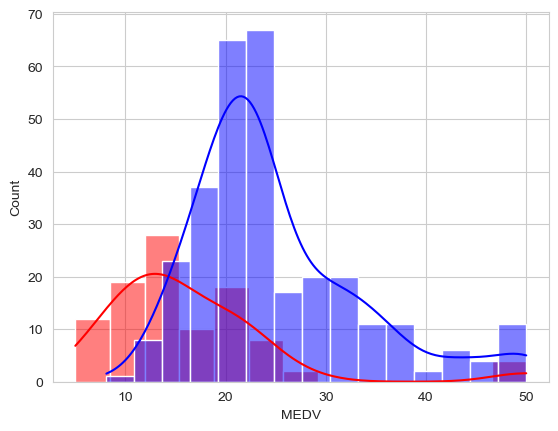

In [98]:
# Comparamos la distribución de la variable target contra la variable categórica RAD
sns.histplot(data = join_data[join_data["RAD"] == 24], x = "MEDV", color = "red", kde = True)
sns.histplot(data = join_data[join_data["RAD"] != 24], x = "MEDV", color = "blue", kde = True)

In [ ]:
# Las features numéricas seleccionadas son:
print(numeric_features)

# Las features categóricas seleccionadas son:
print(cat_features)

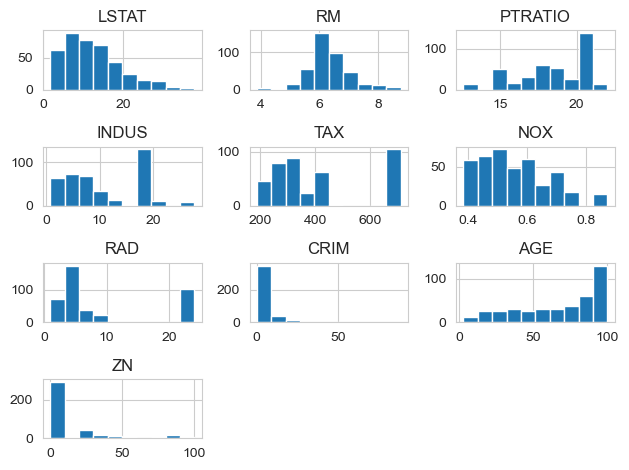

In [ ]:
# Distribuciones de las variables numéricas
join_data[numeric_features].hist()
plt.tight_layout()

In [ ]:
# Instanciamos el escalador y lo entrenamos con las features numéricas
scaler = StandardScaler()
scaler.fit(join_data[numeric_features])

In [ ]:
# Apliquemos el escalado a las features numéricas
X_train[numeric_features] = scaler.transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

In [ ]:
all_features = numeric_features + cat_features

In [ ]:
X_train = X_train[all_features]

In [90]:
# Instanciamos el modelo de regresión lineal y lo entrenamos
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
linear_model.intercept_

In [ ]:
linear_model.coef_

In [ ]:
linear_model.feature_names_in_

In [ ]:
# Evaluamos el modelo contra el conjunto de train
pred_train = linear_model.predict(X_train)

print("MAE en train:", mean_absolute_error(y_train, pred_train))
print("RMSE en train:", np.sqrt(mean_squared_error(y_train, pred_train)))
print("R2 en train:", r2_score(y_train, pred_train))

In [91]:
y_pred = linear_model.predict(X_test)

In [92]:
# Evaluamos el modelo contra el conjunto de test
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")

MAE: 3.26, MSE: 26.13, RMSE: 5.11, R2: 0.64


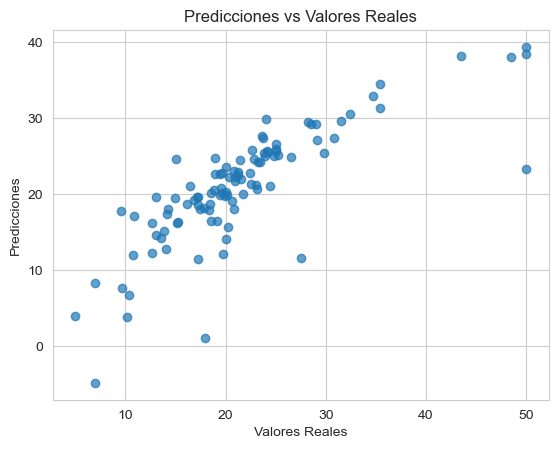

In [93]:
# Pintamos las predicciones vs los valores reales
plt.scatter(y_test, y_pred, alpha = 0.7)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales")
plt.show()

In [94]:
# Resultados de regularizaciones
regularization_results = []

# Ridge regularization
print("\nRegularización Ridge:")
for alpha in [0.1, 1, 10]:
    ridge_model = Ridge(alpha = alpha)
    ridge_model.fit(X_train, y_train)
    ridge_pred = ridge_model.predict(X_test)
    ridge_r2 = r2_score(y_test, ridge_pred)
    regularization_results.append(("Ridge", alpha, ridge_r2))
    print(f"Ridge (alpha = {alpha}): R2 = {ridge_r2:.2f}")

# ElasticNet regularization
print("\nRegularización ElasticNet:")
for alpha in [0.1, 1, 10]:
    elasticnet_model = ElasticNet(alpha = alpha, l1_ratio = 0.5)  # l1_ratio=0.5 combina L1 y L2
    elasticnet_model.fit(X_train, y_train)
    elasticnet_pred = elasticnet_model.predict(X_test)
    elasticnet_r2 = r2_score(y_test, elasticnet_pred)
    regularization_results.append(("ElasticNet", alpha, elasticnet_r2))
    print(f"ElasticNet (alpha={alpha}): R2 = {elasticnet_r2:.2f}")

# Comparación de regularizaciones
print("\nComparación de modelos regularizados:")
for reg_type, alpha, r2 in regularization_results:
    print(f"{reg_type} (alpha = {alpha}): R2 = {r2:.2f}")


Regularización Ridge:
Ridge (alpha = 0.1): R2 = 0.64
Ridge (alpha = 1): R2 = 0.64
Ridge (alpha = 10): R2 = 0.65

Regularización ElasticNet:
ElasticNet (alpha=0.1): R2 = 0.65
ElasticNet (alpha=1): R2 = 0.66
ElasticNet (alpha=10): R2 = 0.57

Comparación de modelos regularizados:
Ridge (alpha = 0.1): R2 = 0.64
Ridge (alpha = 1): R2 = 0.64
Ridge (alpha = 10): R2 = 0.65
ElasticNet (alpha = 0.1): R2 = 0.65
ElasticNet (alpha = 1): R2 = 0.66
ElasticNet (alpha = 10): R2 = 0.57
